# Homicide Data Analysis

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import collections
import sklearn as sk

In [85]:
df = pd.read_csv(r'homicide_by_countries.csv') 

In [86]:
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [87]:
df.shape

(195, 6)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   195 non-null    object 
 1   Region     195 non-null    object 
 2   Subregion  195 non-null    object 
 3   Rate       195 non-null    float64
 4   Count      195 non-null    int64  
 5   Year       195 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.3+ KB


In [89]:
df.isnull().sum()

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [90]:
df['Rate'] = df['Rate'].astype(int)

In [15]:
df.dtypes


Location     object
Region       object
Subregion    object
Rate          int32
Count         int64
Year          int64
dtype: object

# Top 5 Countries with Most homicides

In [91]:
df1 = df[['Location', 'Count']].sort_values('Count', ascending = False).head(5).reset_index()
df1

,index,Location,Count
0,26,Brazil,47722
1,125,Nigeria,44200
2,78,India,40651
3,111,Mexico,36579
4,186,United States,21570


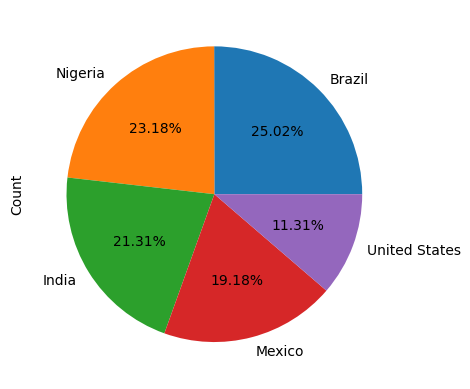

In [92]:
df1.plot(x = 'Location', y= 'Count', kind = 'pie', labels = df1.Location, autopct = '%1.2f%%' )
plt.legend().set_visible(False)

In [49]:
df2 = df.groupby('Region')['Count'].sum().sort_values(ascending = False)
df2

Region
Americas    153597
Asia        105552
Africa       99481
Europe       19869
Oceania        347
Name: Count, dtype: int64

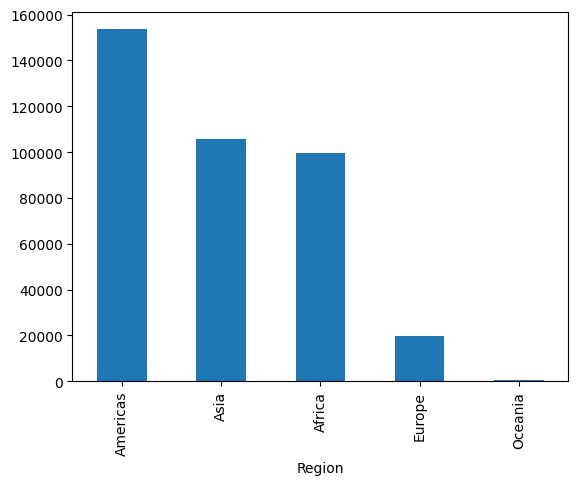

In [93]:
df2.plot(kind = 'bar')
plt.show()

In [58]:
df3 = df.groupby('Subregion')['Count'].sum().sort_values(ascending = False)
df3

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int64

In [94]:
df3.index

Index(['South America', 'Southern Asia', 'Central America', 'Western Africa',
       'South-Eastern Asia', 'Eastern Africa', 'Northern America',
       'Southern Africa', 'Eastern Europe', 'Western Asia', 'Eastern Asia',
       'Northern Africa', 'Caribbean', 'Middle Africa', 'Northern Europe',
       'Western Europe', 'Central Asia', 'Southern Europe',
       'Australia, New Zealand'],
      dtype='object', name='Subregion')

In [95]:
df3.values

array([78872, 58631, 47371, 46318, 25314, 23669, 22317, 21479, 14604,
       11638,  8563,  5538,  5037,  2477,  2097,  2075,  1406,  1093,
         347], dtype=int64)

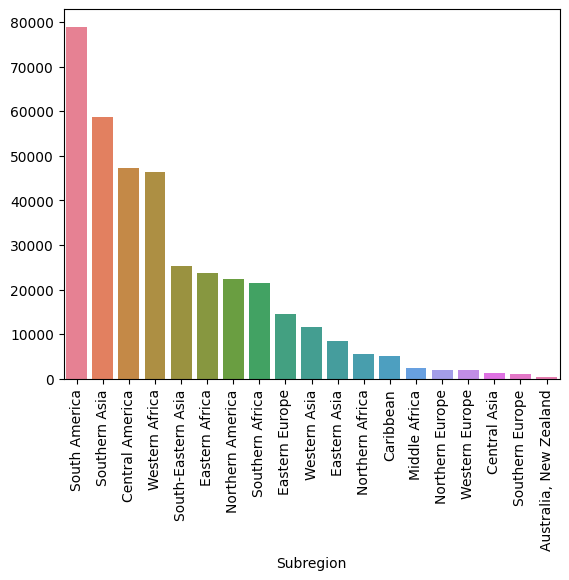

In [96]:
sns.barplot( x = df3.index, y = df3.values, hue = df3.index)
plt.xticks(rotation = 'vertical')
plt.show()

In [97]:
df.Year.value_counts()


Year
2020    94
2019    20
2018    13
2012    11
2017    10
2016     9
2015     9
2009     6
2014     5
2013     5
2011     5
2010     3
2006     2
2007     1
2021     1
2008     1
Name: count, dtype: int64

In [98]:
df[df['Year'] > 2016 ]

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
6,Antigua and Barbuda,Americas,Caribbean,9,9,2020
...,...,...,...,...,...,...
184,United Kingdom,Europe,Northern Europe,1,755,2018
186,United States,Americas,Northern America,6,21570,2020
188,Uruguay,Americas,South America,9,337,2020
189,Uzbekistan,Asia,Central Asia,1,396,2019


In [112]:
df4 = df[df['Region'].isin(['Asia', 'Europe'])]
df4

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
3,Andorra,Europe,Southern Europe,2,2,2020
8,Armenia,Asia,Western Asia,1,52,2020
11,Austria,Europe,Western Europe,0,65,2020
...,...,...,...,...,...,...
183,United Arab Emirates,Asia,Western Asia,0,64,2019
184,United Kingdom,Europe,Northern Europe,1,755,2018
189,Uzbekistan,Asia,Central Asia,1,396,2019
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011


In [125]:
df5 = df4[df4['Year'] > 2016][['Region', 'Year', 'Count']]


In [126]:
df5

,Region,Year,Count
0,Asia,2018,2474
1,Europe,2020,61
3,Europe,2020,2
8,Asia,2020,52
11,Europe,2020,65
...,...,...,...
178,Asia,2020,2095
182,Europe,2017,2751
183,Asia,2019,64
184,Europe,2018,755


In [143]:
df5 = df5.groupby(['Region','Year'])['Count'].sum()

In [144]:
df_unstacked = df5.unstack(level = 0)
df_unstacked

Region,Asia,Europe
Year,,
2017,1787.0,3670.0
2018,16923.0,883.0
2019,6458.0,249.0
2020,53516.0,15066.0
2021,15299.0,NaN


In [146]:
df_unstacked.index

Index([2017, 2018, 2019, 2020, 2021], dtype='int64', name='Year')

In [148]:
df_unstacked.index = df_unstacked.index.astype(int).astype(str)

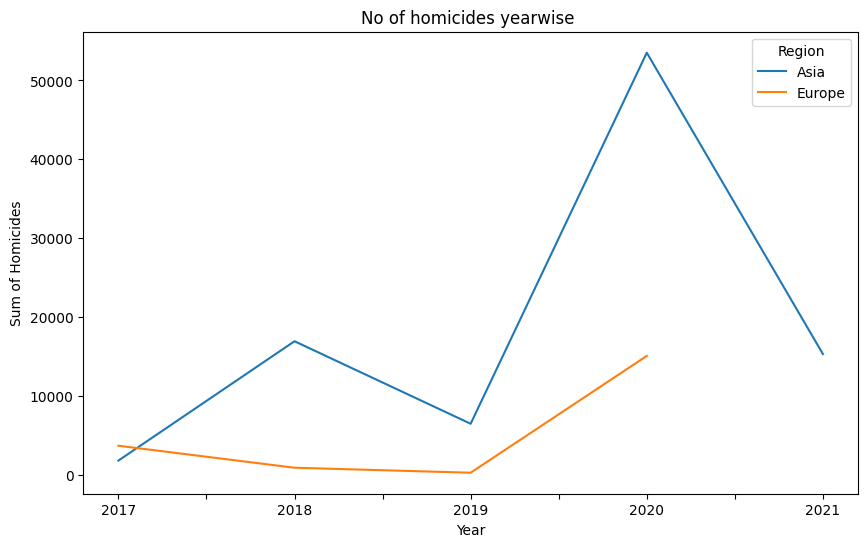

In [158]:
df_unstacked.plot(kind = 'line', figsize = (10,6))
plt.xlabel('Year')
plt.ylabel('Sum of Homicides')
plt.title('Sum of homicides yearwise ')
plt.show()

In [187]:
df6 = df.groupby('Year')['Rate'].sum().sort_values(ascending = False)
df6

Year
2020    608.0
2019    161.0
2012    119.5
2016     78.8
2018     70.0
2015     58.5
2014     54.2
2009     39.5
2017     30.3
2021     28.4
2013     21.7
2007     19.0
2010     18.2
2006     12.5
2011     10.1
2008      5.1
Name: Rate, dtype: float64

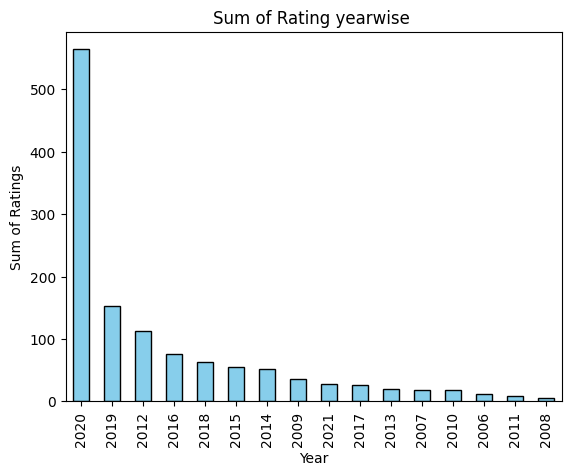

In [186]:
df6.plot(kind = 'bar', color = 'skyblue', edgecolor = 'black')
plt.xlabel('Year')
plt.ylabel('Sum of Ratings')
plt.title('Sum of Rating yearwise ')
plt.show()


In [188]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36.7,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011
192,Yemen,Asia,Western Asia,6.8,1703,2013
193,Zambia,Africa,Eastern Africa,5.4,853,2015


In [199]:
df8 = df.groupby('Subregion')['Count'].mean().sort_values(ascending = False)
df8

Subregion
Southern Asia             6514.555556
South America             6067.076923
Central America           5921.375000
Northern America          4463.400000
Southern Africa           4295.800000
Western Africa            4210.727273
South-Eastern Asia        2531.400000
Eastern Africa            1577.933333
Eastern Europe            1460.400000
Eastern Asia              1223.285714
Northern Africa           1107.600000
Middle Africa              619.250000
Western Asia               581.900000
Central Asia               281.200000
Western Europe             230.555556
Caribbean                  201.480000
Australia, New Zealand     173.500000
Northern Europe            139.800000
Southern Europe             64.294118
Name: Count, dtype: float64

In [200]:
df8.index

Index(['Southern Asia', 'South America', 'Central America', 'Northern America',
       'Southern Africa', 'Western Africa', 'South-Eastern Asia',
       'Eastern Africa', 'Eastern Europe', 'Eastern Asia', 'Northern Africa',
       'Middle Africa', 'Western Asia', 'Central Asia', 'Western Europe',
       'Caribbean', 'Australia, New Zealand', 'Northern Europe',
       'Southern Europe'],
      dtype='object', name='Subregion')

In [201]:
df8.values

array([6514.55555556, 6067.07692308, 5921.375     , 4463.4       ,
       4295.8       , 4210.72727273, 2531.4       , 1577.93333333,
       1460.4       , 1223.28571429, 1107.6       ,  619.25      ,
        581.9       ,  281.2       ,  230.55555556,  201.48      ,
        173.5       ,  139.8       ,   64.29411765])

In [202]:
data = {
    'Category' : df8.index,
    'Value' : df8.values,
    'info' : df8.values    
}

df9 = pd.DataFrame(data)
df9

,Category,Value,info
0,Southern Asia,6514.555556,6514.555556
1,South America,6067.076923,6067.076923
2,Central America,5921.375000,5921.375000
3,Northern America,4463.400000,4463.400000
4,Southern Africa,4295.800000,4295.800000
5,Western Africa,4210.727273,4210.727273
6,South-Eastern Asia,2531.400000,2531.400000
7,Eastern Africa,1577.933333,1577.933333
8,Eastern Europe,1460.400000,1460.400000
9,Eastern Asia,1223.285714,1223.285714


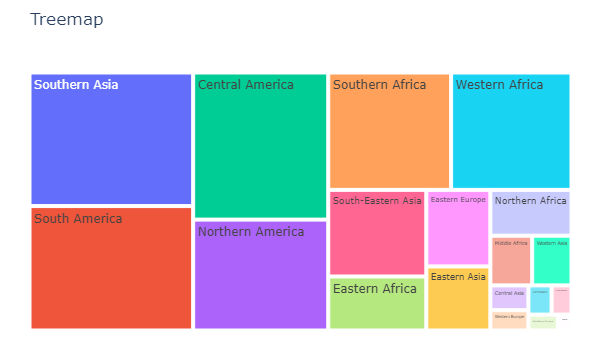

In [208]:
fig = px.treemap(df9, path = ['Category'], values = 'Value', title = 'Treemap')
fig.update_traces(hovertemplate = 'Category : %{label}<br>Value:{value}')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()